
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 100</p>
## <p style="text-align: center;">Due: Tuesday, September 17 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Challenges in Data Science (10 pts)

Refer to the Domino guide under Modules --> Additional Resources

Section 2 describes 8 Challenges. You may have personally encountered or heard of somebody else who encountered some of these challenge. If so,  please write 1-2 paragraphs on what situation was encountered and how it mapped into one the mentioned challenges. If not, think of a hypothetical case and do the same exercise. 


## Answer




# Question 2: MLE Estimate (5+10+10 points)

Consider a coin tossing experiment where a biased coin is tossed repeatedly for $n$ times with independence in successive tosses. 
If we record the outcome of each toss as $X_{i}$, for $i \in \{1,2,3,....,n\}$ as follows

$  
X_{i} = 
     \begin{cases}
       \text{1,} &\quad\text{if $i^{th}$ toss results in $Heads$,}\\
       \text{0,} &\quad\text{otherwise.} \\ 
     \end{cases}
$

then $X_{1}, X_{2}, .... X_{n}$ will be a sequence of $0$'s and $1$'s. Assume that for this coin $P(Heads) = p$, which of course is not known to the experimenter. 

1. The log-likelihood function of the observations, as discussed in the class, denotes the probability of occurrence of the observations. Write the log-likelihood function for the set of observations $X_{1}, X_{2}, .... X_{n}$. 

2. Compute an MLE estimate of $p$.

3. Check if the obtained estimate is unbiased.


## Answer



# Question 3: Multiple Linear Regression in Python (30 pts)

Use the following code to import the California housing prices dataset and linear models in python. The dataset is taken from https://www.kaggle.com/camnugent/california-housing-prices/version/1. I have removed the categorical variables and rows with missing variables to make it easier to run the models. 


In [46]:
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None


train_df = pd.read_csv("reduced_data.csv")
X = train_df.drop(['median_house_value'],axis=1)
Y = train_df['median_house_value']

a. (2 pts) Print the shape (number of rows and columns) of the feature matrix X, and print the first 5 rows.

b.  (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset. Report the regression coefficient of each input feature and evaluate the model using mean absolute error (MAE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

c.  (6 pts) Split the data into a training set and a test set, using the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with test_size = 0.30 and random_state = 11. Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MAE values thus obtained.

d.  (5 pts) Calculate the pearson correlation matrix of the independent variables in the training set (you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)). Report the variables which have magnitude of correlation greater than 0.9 w.r.t the variable 'households'. 

e.  (6 pts) Add the following independent variables to both train and test sets:
1. average_bedrooms = total_bedrooms/households
2. average_rooms = total_rooms/households
3. average_population = total_rooms/households

Recalculate the correlation matrix. What do you observe about the correlation values of the above new variables?

f. (5 pts) Fit an MLR on the new train data (with additional independent variables) and report the MAE on the new train and test sets.

## Answer

## (a)

In [2]:
X.shape

(20433, 8)

In [3]:
X.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


## (b)

In [4]:
reg = linear_model.LinearRegression()
reg.fit(X,Y)
#print('Coefficients: \n', reg.coef_)
pd.concat([pd.DataFrame(X.columns.values,columns = ['Features']),\
           pd.DataFrame(reg.coef_ ,columns = ['Regression_coefficients'])],axis =1)

,Features,Regression_coefficients
0,longitude,-42730.120454
1,latitude,-42509.736942
2,housing_median_age,1157.900307
3,total_rooms,-8.249725
4,total_bedrooms,113.820707
5,population,-38.385578
6,households,47.701351
7,median_income,40297.521715


In [5]:
Y_pred = reg.predict(X)
mean_absolute_error(Y,Y_pred)

50799.6307289529

## (c)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=11)
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)
print('Mean Absolute Error Train ', mean_absolute_error(y_train,y_pred_train))
print('Mean Absolute Error Test ', mean_absolute_error(y_test,y_pred_test))


Mean Absolute Error Train  50764.105024478515
Mean Absolute Error Test  50882.522107598445


The two mean absolute error obtained on the test data set is slightly higher

## (d)

In [7]:
X_train.corr()[X_train.corr(method='pearson')['households'] > 0.9].index.tolist()

['total_rooms', 'total_bedrooms', 'population', 'households']

Independent variables having correlation greater than 0.9 w.r.t 'households': total_rooms, total_bedrooms, population

## (e)

In [8]:
X_train['avg_bedrooms'] = X_train['total_bedrooms']/X_train['households']
X_train['avg_rooms'] = X_train['total_rooms']/X_train['households']
X_train['avg_population'] = X_train['population']/X_train['households']

X_test['avg_bedrooms'] = X_test['total_bedrooms']/X_test['households']
X_test['avg_rooms'] = X_test['total_rooms']/X_test['households']
X_test['avg_population'] = X_test['population']/X_test['households']

X_train.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,avg_bedrooms,avg_rooms,avg_population
longitude,1.000000,-0.925627,-0.111272,0.042788,0.069305,0.101596,0.056116,-0.020466,0.017548,-0.027099,0.011811
latitude,-0.925627,1.000000,0.013098,-0.034147,-0.066424,-0.109600,-0.070537,-0.074943,0.062059,0.104294,-0.002330
housing_median_age,-0.111272,0.013098,1.000000,-0.356534,-0.316644,-0.294652,-0.298702,-0.115736,-0.077163,-0.158539,0.012569
total_rooms,0.042788,-0.034147,-0.356534,1.000000,0.927454,0.859323,0.916556,0.198486,0.036170,0.146227,-0.031031
total_bedrooms,0.069305,-0.066424,-0.316644,0.927454,1.000000,0.880929,0.979547,-0.013082,0.054525,0.004237,-0.036556
population,0.101596,-0.109600,-0.294652,0.859323,0.880929,1.000000,0.910283,-0.001523,-0.062026,-0.072951,0.077684
households,0.056116,-0.070537,-0.298702,0.916556,0.979547,0.910283,1.000000,0.008033,-0.050050,-0.081950,-0.034892
median_income,-0.020466,-0.074943,-0.115736,0.198486,-0.013082,-0.001523,0.008033,1.000000,-0.059447,0.350785,0.000417
avg_bedrooms,0.017548,0.062059,-0.077163,0.036170,0.054525,-0.062026,-0.050050,-0.059447,1.000000,0.833841,-0.002194
avg_rooms,-0.027099,0.104294,-0.158539,0.146227,0.004237,-0.072951,-0.081950,0.350785,0.833841,1.000000,0.003475


Observation: avg_bedrooms and avg_rooms are highly positively correlated and understandably so, as the number of rooms increases the bedrooms tend to increase too. Both of these also show negligible correlation with the avg_population

## (f)

In [9]:
reg2 = linear_model.LinearRegression()
reg2.fit(X_train,y_train)
y_pred_train = reg2.predict(X_train)
y_pred_test = reg2.predict(X_test)
print('Mean Absolute Error Train ', mean_absolute_error(y_train,y_pred_train))
print('Mean Absolute Error Test ', mean_absolute_error(y_test,y_pred_test))

Mean Absolute Error Train  50474.268791457886
Mean Absolute Error Test  50783.974603927876


# Question 4: Ridge and Lasso Regression (30 points)


Using the same data from before, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. Use the same train and test data with additional augmented columns from before. Scale the data so that each of the dependent variables have zero mean and unit variance. You can use the [sklearn.preprocessing.scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) function for this.

In [40]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
import numpy as np

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MAE as the scoring metric. (8pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot. What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE) on the test data for each. (5pts)

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for all variables. (5pts)

5) Why did we have to scale the data before regularization? (5pts)


## Answer



## 1

In [41]:
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

alphas =  10**np.linspace(10,-2,100)*0.5
kf = KFold(n_splits=5)
mae_df = pd.DataFrame(columns = alphas)

#Loop for 5 cross validations
for train_index, test_index in kf.split(X_train):
    X_train_cv, X_test_cv = np.array(X_train_scaled)[train_index], np.array(X_train_scaled)[test_index]
    y_train_cv, y_test_cv = np.array(y_train)[train_index], np.array(y_train)[test_index]
    mae = []
    #Looping for alphas(lambda)
    for i in range(len(alphas)):
        reg = linear_model.Ridge(alpha=alphas[i])
        reg.fit(X_train_cv,y_train_cv)
        prediction = reg.predict(X_test_cv)
        mae.append(mean_absolute_error(y_test_cv,prediction))
    mae_df.loc[len(mae_df)] = mae
    
# Calculating the minimum lambda based on the average MAE 
min_lambda_ridge = mae_df.mean(axis =0).idxmin()

print ('Best lambda based on min average MAE from Ridge Regression is :', min_lambda_ridge)

Best lambda based on min average MAE from Ridge Regression is : 37.823166377731454


In [42]:
alphas =  10**np.linspace(10,-2,100)*0.5
kf = KFold(n_splits=5)
mae_df_lasso = pd.DataFrame(columns = alphas)

#Loop for 5 cross validations
for train_index, test_index in kf.split(X_train):
    X_train_cv, X_test_cv = np.array(X_train_scaled)[train_index], np.array(X_train_scaled)[test_index]
    y_train_cv, y_test_cv = np.array(y_train)[train_index], np.array(y_train)[test_index]
    mae = []
    #Looping for alphas(lambda)
    for i in range(len(alphas)):
        reg = linear_model.Lasso(alpha=alphas[i])
        reg.fit(X_train_cv,y_train_cv)
        prediction = reg.predict(X_test_cv)
        mae.append(mean_absolute_error(y_test_cv,prediction))
    mae_df_lasso.loc[len(mae_df)] = mae
    
# Calculating the minimum lambda based on the average MAE 
min_lambda_lasso = mae_df_lasso.mean(axis =0).idxmin()

print ('Best lambda based on min average MAE from Lasso Regression is :', min_lambda_lasso)

Best lambda based on min average MAE from Lasso Regression is : 0.005


## 2

Text(0.5, 1.0, 'Ridge coefficients as a function of regularization')

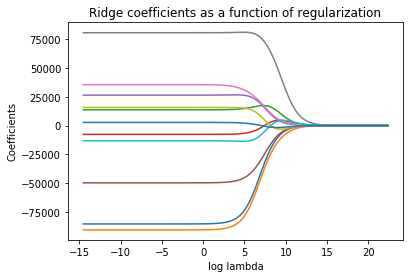

In [51]:
#Plotting ridge coefficents as a function of the regularization
import matplotlib.pyplot as plt
alphas =  10**np.linspace(10,-6,100)*0.5
coefs = []
for i in range(len(alphas)):
        reg = linear_model.Ridge(alpha = alphas[i])
        reg.fit(X_train_scaled,y_train)
        coefs.append(reg.coef_)
        
# Plot ridge coefficients asa function of lambda
fig, ax = plt.subplots(1, 1)
ax.plot(np.log(alphas), coefs)
#ax.set_xscale('log')
plt.xlabel('log lambda')
plt.ylabel('Coefficients')
plt.title('Ridge coefficients as a function of regularization')

Text(0.5, 1.0, 'Lasso coefficients as a function of regularization')

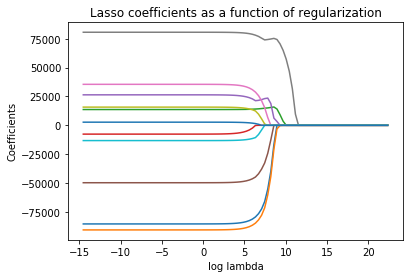

In [52]:
#Plotting lasso coefficents as a function of the regularization
import matplotlib.pyplot as plt
alphas =  10**np.linspace(10,-6,100)*0.5
coefs = []
for i in range(len(alphas)):
        reg = linear_model.Lasso(alpha = alphas[i])
        reg.fit(X_train_scaled,y_train)
        coefs.append(reg.coef_)
        
# Plot ridge coefficients asa function of lambda
fig, ax = plt.subplots(1, 1)
ax.plot(np.log(alphas), coefs)
#ax.set_xscale('log')
plt.xlabel('log lambda')
plt.ylabel('Coefficients')
plt.title('Lasso coefficients as a function of regularization')

Overall, when the regularisation parameter is increased, the coefficients start converging to zero. From the above two plots we can see that ridge regularisation tends to get coefficients to zero rather smoothly while the lasso shows more ubruptness.

## 3

In [56]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
prediction_lin_reg = lin_reg.predict(X_test_scaled)
Error_lin_reg = mean_absolute_error(y_test,prediction_lin_reg)
print("Prediction error for linear regression is : ",Error_lin_reg)

lasso = linear_model.Lasso(alpha = min_lambda_lasso)
lasso.fit(X_train_scaled, y_train)
prediction_lasso = lasso.predict(X_test_scaled)
Error_lasso = mean_absolute_error(y_test,prediction_lasso)
print("Prediction error for linear regression is : ",Error_lasso)

ridge = linear_model.Ridge(alpha = min_lambda_ridge)
ridge.fit(X_train_scaled, y_train)
prediction_ridge = ridge.predict(X_test_scaled)
Error_ridge = mean_absolute_error(y_test,prediction_ridge)
print("Prediction error for linear regression is : ",Error_ridge)

Prediction error for linear regression is :  50682.397574551534
Prediction error for linear regression is :  50682.39724675481
Prediction error for linear regression is :  50635.1150325643


## 4

In [83]:
#Fitting LassoCV
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000)
lasso_cv.fit(X_train_scaled, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=10000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [84]:
#Print the alpha parameter obtained above
lambda_best = lasso_cv.alpha_
print("The best lambda chosen by LassoCV is : ", lambda_best)

The best lambda chosen by LassoCV is :  161.80167643776653


In [88]:
#Fit lasso using the above alpha and report MAE on Test.
lasso_train = Lasso(alpha=lambda_best)
lasso_train.fit(X_train_scaled, y_train)
lasso_pred_test = lasso_train.predict(X_test_scaled)
print(lasso_train.coef_)
print("The MAE for LassoCV is : " , mean_absolute_error(y_test,lasso_pred_test))

[-83729.40788737 -88966.60778197  13793.24655891  -5441.52359581
  24891.29887821 -48359.51663192  33593.70067617  79916.03828368
  14815.92067716 -12517.52849661   2360.88791625]
The MAE for LassoCV is :  50681.95000148011


## 5


## Answer


# Question 5 (5pts)

How do you think the performance of your model varies in the train and test set as you increase(decrease) the number of examples in the training dataset? Explain why does it change in a particular way.

## Answer
